<a href="https://colab.research.google.com/github/Snaiyer1/MAT_421/blob/main/Module_G2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Simpson's Rule

Simpson’s Rule approximates the integral of a function f(x) over an interval [a,b] by fitting a quadratic polynomial to the function over pairs of subintervals. It's more accurate than simpler methods like the Trapezoidal Rule because it accounts for curvature in the function.

The rule works by dividing the integration interval into an even number of subintervals, fitting a quadratic polynomial through three consecutive points, integrating the polynomial exactly, finally summing these approximations over the entire interval.

Consider two consecutive subintervals: $[x_{i-1}, x_i]$ and $[x_i, x_{i+1}]$.
We fit a quadratic polynomial through the points

$(x_{i-1}, f(x_{i-1}))$
$(x_i, f(x_i))$
$(x_{i+1}, f(x_{i+1}))$


Using Lagrange polynomials, we can construct
$$P_i(x) = f(x_{i-1})\frac{(x-x_i)(x-x_{i+1})}{(x_{i-1}-x_i)(x_{i-1}-x_{i+1})} + f(x_i)\frac{(x-x_{i-1})(x-x_{i+1})}{(x_i-x_{i-1})(x_i-x_{i+1})} + f(x_{i+1})\frac{(x-x_{i-1})(x-x_i)}{(x_{i+1}-x_{i-1})(x_{i+1}-x_i)}$$​

For evenly spaced points with step size $h$
$$P_i(x) = \frac{f(x_{i-1})}{2h^2}(x-x_i)(x-x_{i+1}) - \frac{f(x_i)}{h^2}(x-x_{i-1})(x-x_{i+1}) + \frac{f(x_{i+1})}{2h^2}(x-x_{i-1})(x-x_i)$$

We integrate this polynomial over the two subintervals
$$\int_{x_{i-1}}^{x_{i+1}} P_i(x) dx = \frac{h}{3}[f(x_{i-1}) + 4f(x_i) + f(x_{i+1})]$$

To approximate the integral over the entire interval $[a,b]$, we sum all of the local approximations
$$\int_{a}^{b} f(x) dx \approx \frac{h}{3}\left[f(x_0) + 4\sum_{i=1,i\text{ odd}}^{n-1}f(x_i) + 2\sum_{i=2,i\text{ even}}^{n-2}f(x_i) + f(x_n)\right]$$

where $h = \frac{b-a}{n}$ is the step size, $n$ is the number of subintervals, $x_0 = a$, and $x_n = b$.


Simpson's Rule requires an even number of intervals and, consequently, an odd number of grid points.

Through Taylor series expansion, we can analyze the error of Simpson's Rule. The local error is $O(h^5)$ and the global error is $O(h^4)$. This is significantly better than the Trapezoidal Rule, which has global error $O(h^2)$.

Here is an implementation of the rule:

In [1]:
import numpy as np

def simpson_rule(f, a, b, n):
    if n % 2 == 0:
        raise ValueError("Number of grid points must be odd")

    h = (b - a) / (n - 1)
    x = np.linspace(a, b, n)
    y = f(x)
    result = h/3 * (y[0] + y[-1] +
                    4 * sum(y[1:-1:2]) +
                    2 * sum(y[2:-2:2]))

    return result

The exact value of this integral is 2. Let's approximate it using Simpson's Rule with 11 grid points:

In [2]:
import numpy as np

a = 0
b = np.pi
n = 11

h = (b - a) / (n - 1)
x = np.linspace(a, b, n)
f = np.sin(x)

simps = (h/3) * (f[0] + 2*sum(f[2:n-1:2]) + 4*sum(f[1:n:2]) + f[n-1])
exact_value = 2
error = exact_value - simps

print(f"Simpson's approximation: {simps}")
print(f"Exact value: {exact_value}")
print(f"Error: {error}")

Simpson's approximation: 2.0001095173150043
Exact value: 2
Error: -0.00010951731500430384


We can compare the accuracy with the Trapezoid Rule:

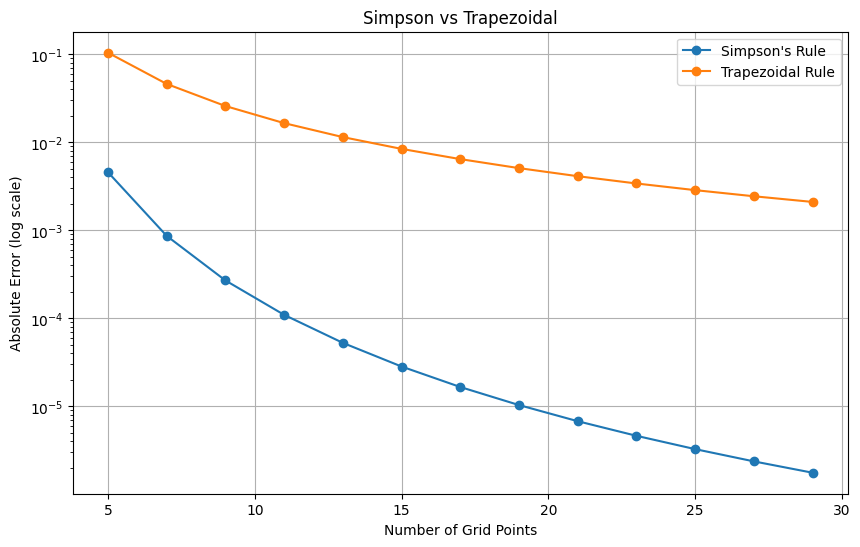

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.sin(x)

def trapezoidal_rule(f, a, b, n):
    h = (b - a) / (n - 1)
    x = np.linspace(a, b, n)
    y = f(x)
    return h * (0.5*y[0] + 0.5*y[-1] + sum(y[1:-1]))

a, b = 0, np.pi
exact = 2
grid_points = range(5, 31, 2)
simpson_errors = []
trap_errors = []

for n in grid_points:
    simpson = simpson_rule(f, a, b, n)
    trap = trapezoidal_rule(f, a, b, n)

    simpson_errors.append(abs(simpson - exact))
    trap_errors.append(abs(trap - exact))

plt.figure(figsize=(10, 6))
plt.semilogy(grid_points, simpson_errors, 'o-', label="Simpson's Rule")
plt.semilogy(grid_points, trap_errors, 'o-', label="Trapezoidal Rule")
plt.xlabel('Number of Grid Points')
plt.ylabel('Absolute Error (log scale)')
plt.title('Simpson vs Trapezoidal')
plt.legend()
plt.grid(True)